<a href="https://colab.research.google.com/github/C00ldudeNoonan/Japan-in-the-Pacific/blob/main/WW2MapTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Test Cells


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.3 MB/s 
     |████████████████████████████████| 16.7 MB 517 kB/s 
     |████████████████████████████████| 6.3 MB 26.0 MB/s 


In [ ]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame


# Intiail country border shapefile
url = '/vsicurl/https://github.com/C00ldudeNoonan/Japan-in-the-Pacific/raw/main/cntry1938.shp'
borders_file = gpd.read_file(url)
borders_file.crs = "EPSG:4326"

# Ocean Shapefiles

SouthChinaSea = '/vsicurl/https://github.com/C00ldudeNoonan/Japan-in-the-Pacific/raw/main/SouthChinaSea.shp' 
SouthChinaSea = gpd.read_file(SouthChinaSea)
SouthChinaSea.crs = "EPSG:4326"

SouthPacific = '/vsicurl/https://github.com/C00ldudeNoonan/Japan-in-the-Pacific/raw/main/SouthEastPacific.shp' 
SouthPacific = gpd.read_file(SouthPacific)
SouthPacific.crs = "EPSG:4326"

IndianOcean = '/vsicurl/https://github.com/C00ldudeNoonan/Japan-in-the-Pacific/raw/main/IndianOcean.shp' 
IndianOcean = gpd.read_file(IndianOcean)
IndianOcean.crs = "EPSG:4326"

NorthPacific = '/vsicurl/https://github.com/C00ldudeNoonan/Japan-in-the-Pacific/raw/main/NorthPacific.shp' 
NorthPacific = gpd.read_file(NorthPacific)
NorthPacific.crs = "EPSG:4326"

# Minor Geographic features
RiversAndLakes = '/vsicurl/https://github.com/C00ldudeNoonan/Japan-in-the-Pacific/raw/main/RiversAndLakes.shp' 
RiversAndLakes = gpd.read_file(RiversAndLakes)
RiversAndLakes.crs = "EPSG:4326"

Reefs = '/vsicurl/https://github.com/C00ldudeNoonan/Japan-in-the-Pacific/raw/main/Reefs.shp' 
Reefs = gpd.read_file(Reefs)
Reefs.crs = "EPSG:4326"

MinorIslands = '/vsicurl/https://github.com/C00ldudeNoonan/Japan-in-the-Pacific/raw/main/MinorIslands.shp' 
MinorIslands = gpd.read_file(MinorIslands)
MinorIslands.crs = "EPSG:4326"


# remove antarctica
borders_file = borders_file[~borders_file['NAME'].isin(['Antarctica', 'Greenland'])]

fig, ax = plt.subplots(figsize = (14,10))
#ax.set_xlim([aoi_bounds[0], aoi_bounds[1]])
#ax.set_ylim([aoi_bounds[2], aoi_bounds[3]])
borders_file.boundary.plot(ax = ax, color='black', linewidth=0.5) 

# Oceans
SouthChinaSea.plot(ax=ax, facecolor='#618A98', linewidth=0.1) 
SouthPacific.plot(ax=ax, facecolor='#618A98', linewidth=0.1) 
IndianOcean.plot(ax=ax, facecolor='#618A98', linewidth=0.1)
NorthPacific.plot(ax=ax, facecolor='#618A98', linewidth=0)

MinorIslands.boundary.plot(ax = ax, color='black', linewidth=0.5)
Reefs.plot(ax = ax, color="#e63946", linewidth=0.5)
RiversAndLakes.plot(ax = ax, color='#006d77', linewidth=0.05)
plt.text(173, -50, "2022-01", fontsize=14)
plt.axis('off')
plt.show()




In [ ]:
#borders_file2 = borders_file.to_crs("EPSG:3832")
#borders_file2 = borders_file.to_crs("EPSG:2163")
# okay crs
borders_file2 = borders_file.to_crs("EPSG:3111") 
#borders_file2 = borders_file.to_crs("EPSG:3832")
# print(borders_file2.head())
aoi_bounds = borders_file2[borders_file2['NAME']=='Japan'].geometry.total_bounds
print(aoi_bounds)

plot_bounds = [aoi_bounds[0]+100000,aoi_bounds[1]+100000 ,aoi_bounds[2]+100000 ,aoi_bounds[3]+100000 ]
print("-----------")
print(aoi_bounds)

fig, ax = plt.subplots(figsize = (10,6))
ax.set_xlim([aoi_bounds[0], aoi_bounds[1]])
ax.set_ylim([aoi_bounds[2], aoi_bounds[3]])
borders_file2.boundary.plot(ax = ax, color='black', linewidth=0.5) 
#plt.axis('off')

plt.show()



Seems to work as a canvas plot



## Map Canvas. Asia Borders 1937


*   ~~Need continents~~
*   ~~Need Borders for Japan, China, USA, SO, Netherlands, UK, France, Australia~~
* ~~Need Unique Colors for Countries~~
* ~~Make Map curved and focus on Pacific Ocean~~
* Need new shapefile for Japan, Alaska, Indonesia, Philipines
---


In [ ]:
plot_bounds = [aoi_bounds[0]-6000000,aoi_bounds[1]+9000000 ,aoi_bounds[2]-1800000 ,aoi_bounds[3]+2660000 ]
print("-----------")
print(plot_bounds)

fig, ax = plt.subplots(figsize = (14,10))
ax.set_xlim([plot_bounds[0], plot_bounds[1]])
ax.set_ylim([plot_bounds[2], plot_bounds[3]])
borders_file2.boundary.plot(ax = ax, color='black', linewidth=0.5) 
plt.axis('off')

plt.show()

In [ ]:
# webscrape Japanese Naval Losses
import pandas as pd
import requests
from bs4 import BeautifulSoup


# getting webpage and html
url = "https://www.ibiblio.org/hyperwar/Japan/IJN/JANAC-Losses/JANAC-Losses-6.html"
r = requests.get(url)

html = r.text
soup = BeautifulSoup(html)

# print('Classes of each table:')
# for table in soup.find_all('table'):
#     print(table.get('class'))
# the tables dont have classes

# getting all tables on the page
tables = soup.findAll("table")


data = []

# getting all rows from the table
for table in tables:
  for row in table.findAll('tr'):  
    cols = row.findAll('td')
    #print(cols)
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele != 'e'])

# need to clean up output and put into pandas dataframe
data2 = []
for ele in data:
  if len(ele) < 3:
    pass
  data2.append(ele)  


data2 = data2[2:]
print(data2)

# need to fix row 2
df = pd.DataFrame (data2, columns = ['Month', 'Day', 'Year', 'Ship Name', 'Ship Type', 'Tonnage', 'Latitiude', 'Longitude', 'Assessment' ,'Extra'])

print(df.head())
df.to_csv("shipdata.csv")
# save as csv and put on github
from google.colab import files
files.download("shipdata.csv")

[['Dec', '18', '1942', 'TENRYU', 'Light Cruiser', '3,300', '', '5-11S, 145-57E', 'Sunk'], ['Feb', '20', '1943', 'OSHIO', 'Destroyer', '1,850', '', '0-50S, 146-06E', 'Sunk'], ['Feb', '20', '1943', 'UNKNOWN', 'Frigate', '750', '0-50S, 146-06E', 'Sunk'], ['Sep', '4', '1943', 'HEIJO MARU', 'Ex-Gunboat', '2,627', '', '05-32S, 156-23E', 'Sunk'], ['Nov', '25', '1943', 'KENZAN MARU', 'Cargo', '4,705', '', '0-51N, 145-56E', 'Sunk'], ['Jan', '12', '1944', 'CHOKO MARU', 'Ex-Gunboat', '2,629', '', '3-30N, 147-27E', 'Sunk'], ['Jan', '14', '1944', 'SAZANAMI', 'Destroyer', '1,950', '', '5-15N, 141-15E', 'Sunk'], ['Jun', '19', '1944', 'TAIHO', 'Aircraft Carrier', '31,000', '', '12-22N, 137-04E', 'Sunk'], ['Sep', '5', '1944', 'SHINGETSU MARO', 'Cargo', '880', '', '32-24N, 134-15E', 'Sunk'], ['Sep', '11', '1944', 'SUBMARINE CHASER NO 165', 'Submarine Chaser', '170', '', '32-20N, 131-50E', 'Sunk'], ['', '', '', '', '10 Vessels', '49,861', '', '', ''], [], ['Sep', '19', '1942', 'SHIROGANE MARU', 'Pessenge

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ~~Webscrape Japanese Naval Losses~~


In [ ]:
for name in Canvas['NAME']:
  print(name)

Japan = Canvas[Canvas['NAME'].isin(['Japan', 'Taiwan'])]
UnitedStates = Canvas[Canvas['NAME']=='United States']
Mexico = Canvas[Canvas['NAME']=='Mexico']
China = Canvas[Canvas['NAME']=='China']
DutchEastIndies = Canvas[Canvas['NAME']=='Dutch East Indies']
Britain = Canvas[Canvas['NAME'].isin(['Ceylon', 'Malaysia','Burma', 'Brunei'])]
NewZealand = Canvas[Canvas['NAME']=='New Zealand']
Australia = Canvas[Canvas['NAME'].isin(['Australia', 'Papua New Guinea'])]
USSR = Canvas[Canvas['NAME'].isin(['USSR', 'Mongolia'])]
India = Canvas[Canvas['NAME']=='India']
FrenchIndoChina = Canvas[Canvas['NAME'].isin(['French Indo-China', 'Cochin China'])]
Manchuria = Canvas[Canvas['NAME']=='Manchuria']
Laos = Canvas[Canvas['NAME']=='Laos']
Philippines = Canvas[Canvas['NAME']=='Philippines']
Thailand = Canvas[Canvas['NAME']=='Thailand']
Tibet = Canvas[Canvas['NAME']=='Tibet']
Cambodia = Canvas[Canvas['NAME']=='Cambodia']
Bhutan = Canvas[Canvas['NAME']=='Bhutan']
Nepal = Canvas[Canvas['NAME']=='Nepal']

## Naval Losses Point plot over time


Gif reference: https://towardsdatascience.com/basics-of-gifs-with-pythons-matplotlib-54dd544b6f30


Subplot Gif Reference: https://stackoverflow.com/questions/29832055/animated-subplots-using-matplotlib


Converting lat and long to correct value for plotting
https://stackoverflow.com/questions/50193159/converting-pandas-data-frame-with-degree-minute-second-dms-coordinates-to-deci


Geographic Shapefiles
http://www.naturalearthdata.com/downloads/110m-physical-vectors/


Ocean shapefiles
https://www.marineregions.org/


GridSpec Example:
https://matplotlib.org/3.1.1/tutorials/intermediate/gridspec.html


---


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 35.2 MB/s 
     |████████████████████████████████| 6.3 MB 46.1 MB/s 
     |████████████████████████████████| 16.7 MB 478 kB/s 


In [ ]:
from shapely import geometry
from shapely.geometry import Point, Polygon
import pandas as pd
from datetime import datetime
import geopandas as gpd
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from geopandas import GeoDataFrame
import imageio
import os
import matplotlib.font_manager
ship_losses = pd.read_csv("https://raw.githubusercontent.com/C00ldudeNoonan/Japan-in-the-Pacific/main/shipdata.csv")


# data cleaning
# 1 seperate out Latitude & longitude direction & minutes
# in excel

# 2 take comma out of tonnage and convert to int
ship_losses['Tonnage'] = ship_losses['Tonnage'].str.replace(',', '')
ship_losses['Tonnage'] = ship_losses['Tonnage'].str.replace(',,', '')
ship_losses['Tonnage'] = ship_losses['Tonnage'].astype(int)
# 3 convert lat and long into float 

ship_losses['Latitiude'] = ship_losses['Latitiude'].astype(float)
ship_losses['Longitude'] = ship_losses['Longitude'].astype(float)
# 4 create geomtery for lat/long

pointgeometry = [Point(xy) for xy in zip(ship_losses['Longitude'],ship_losses['Latitiude'])]
gdf = GeoDataFrame(ship_losses, crs ="EPSG:4326", geometry=pointgeometry)


# index iteratorQ
gdf['Month Index'] = gdf['Month Index'].astype(int)

months = list(gdf['Month Index'].unique())
months.sort()


gdf = gdf.to_crs("EPSG:3111")


# Intiail country border shapefile
Canvas = '/vsicurl/https://github.com/C00ldudeNoonan/Japan-in-the-Pacific/raw/main/cntry1938.shp'
Canvas = gpd.read_file(Canvas)
Canvas.crs = "EPSG:4326"

# Ocean Shapefiles

SouthChinaSea = '/vsicurl/https://github.com/C00ldudeNoonan/Japan-in-the-Pacific/raw/main/SouthChinaSea.shp' 
SouthChinaSea = gpd.read_file(SouthChinaSea)
SouthChinaSea.crs = "EPSG:4326"
SouthChinaSea = SouthChinaSea.to_crs("EPSG:3111") 

SouthPacific = '/vsicurl/https://github.com/C00ldudeNoonan/Japan-in-the-Pacific/raw/main/SouthEastPacific.shp' 
SouthPacific = gpd.read_file(SouthPacific)
SouthPacific.crs = "EPSG:4326"
SouthPacific = SouthPacific.to_crs("EPSG:3111") 

IndianOcean = '/vsicurl/https://github.com/C00ldudeNoonan/Japan-in-the-Pacific/raw/main/IndianOcean.shp' 
IndianOcean = gpd.read_file(IndianOcean)
IndianOcean.crs = "EPSG:4326"
IndianOcean = IndianOcean.to_crs("EPSG:3111") 

NorthPacific = '/vsicurl/https://github.com/C00ldudeNoonan/Japan-in-the-Pacific/raw/main/NorthPacific.shp' 
NorthPacific = gpd.read_file(NorthPacific)
NorthPacific.crs = "EPSG:4326"
NorthPacific = NorthPacific.to_crs("EPSG:3111") 

# Minor Geographic features
RiversAndLakes = '/vsicurl/https://github.com/C00ldudeNoonan/Japan-in-the-Pacific/raw/main/RiversAndLakes.shp' 
RiversAndLakes = gpd.read_file(RiversAndLakes)
RiversAndLakes.crs = "EPSG:4326"
RiversAndLakes = RiversAndLakes.to_crs("EPSG:3111")

Reefs = '/vsicurl/https://github.com/C00ldudeNoonan/Japan-in-the-Pacific/raw/main/Reefs.shp' 
Reefs = gpd.read_file(Reefs)
Reefs.crs = "EPSG:4326"
Reefs = Reefs.to_crs("EPSG:3111")

MinorIslands = '/vsicurl/https://github.com/C00ldudeNoonan/Japan-in-the-Pacific/raw/main/MinorIslands.shp' 
MinorIslands = gpd.read_file(MinorIslands)
MinorIslands.crs = "EPSG:4326"
MinorIslands = MinorIslands.to_crs("EPSG:3111")


Canvas = Canvas[~Canvas['NAME'].isin(['Antarctica', 'Greenland'])]
Canvas = Canvas.to_crs("EPSG:3111") 

# countries
Japan = Canvas[Canvas['NAME'].isin(['Japan', 'Taiwan'])]
UnitedStates = Canvas[Canvas['NAME']=='United States']
Mexico = Canvas[Canvas['NAME']=='Mexico']
China = Canvas[Canvas['NAME']=='China']
DutchEastIndies = Canvas[Canvas['NAME']=='Dutch East Indies']
Britain = Canvas[Canvas['NAME'].isin(['Ceylon', 'Malaysia','Burma', 'Brunei'])]
NewZealand = Canvas[Canvas['NAME']=='New Zealand']
Australia = Canvas[Canvas['NAME'].isin(['Australia', 'Papua New Guinea'])]
USSR = Canvas[Canvas['NAME'].isin(['USSR', 'Mongolia'])]
India = Canvas[Canvas['NAME']=='India']
FrenchIndoChina = Canvas[Canvas['NAME'].isin(['French Indo-China', 'Cochin China'])]
Manchuria = Canvas[Canvas['NAME']=='Manchuria']
Laos = Canvas[Canvas['NAME']=='Laos']
Philippines = Canvas[Canvas['NAME']=='Philippines']
Thailand = Canvas[Canvas['NAME']=='Thailand']
Tibet = Canvas[Canvas['NAME']=='Tibet']
Cambodia = Canvas[Canvas['NAME']=='Cambodia']
Bhutan = Canvas[Canvas['NAME']=='Bhutan']
Nepal = Canvas[Canvas['NAME']=='Nepal']



aoi_bounds = Canvas[Canvas['NAME']=='Japan'].geometry.total_bounds
plot_bounds = [aoi_bounds[0]+100000, aoi_bounds[1]+100000, aoi_bounds[2]+100000, aoi_bounds[3]+100000 ]
plot_bounds = [aoi_bounds[0]-6000000, aoi_bounds[1]+9000000, aoi_bounds[2]-1800000, aoi_bounds[3]+2660000 ]

In [ ]:
def month_name(month_int):
  if month_int ==1:
    return "Jan"
  elif month_int == 2:
    return "Feb"
  elif month_int == 3:
    return "Mar"
  elif month_int == 4:
    return "Apr"
  elif month_int == 5:
    return "May"
  elif month_int == 6:
    return "Jun"
  elif month_int == 7:
    return "Jul"
  elif month_int == 8:
    return "Aug"
  elif month_int == 9:
    return "Sep"
  elif month_int == 10:
    return "Oct"
  elif month_int == 11:
    return "Nov"
  else:
    return "Dec"   


def map_plot(month_index):
  
  fig  = plt.figure(constrained_layout=False, figsize=(60, 20))
  gs1 = fig.add_gridspec(nrows=4, ncols=8, hspace=0.1)
  fig_ax1 = fig.add_subplot(gs1[0:2,:])
  fig_ax2 = fig.add_subplot(gs1[2,3:5])
  # Limits
  fig_ax1.set_xlim([plot_bounds[0], plot_bounds[1]])
  fig_ax1.set_ylim([plot_bounds[2], plot_bounds[3]])



  subsetdf = gdf[gdf['Month Index']<=month_index]

  Canvas.boundary.plot(ax = fig_ax1, color='black', linewidth=1 )

  # Oceans
  SouthChinaSea.plot(ax=fig_ax1, facecolor='#a8d5e2')
  SouthPacific.plot(ax=fig_ax1, facecolor='#a8d5e2')
  IndianOcean.plot(ax=fig_ax1, facecolor='#a8d5e2') 
  NorthPacific.plot(ax=fig_ax1, facecolor='#a8d5e2') 

  # Minor Geographic features
  MinorIslands.plot(ax = fig_ax1, color='black', linewidth=1)
  Reefs.plot(ax = fig_ax1, color="black", linewidth=1)
  RiversAndLakes.plot(ax = fig_ax1, color='#005f73', linewidth=0.3)

  # Countries
  Japan.plot(ax = fig_ax1, color='#c9b576', alpha=0.5) 
  UnitedStates.plot(ax = fig_ax1, color='#184e77', alpha=0.5) 
  Mexico.plot(ax = fig_ax1, color='#007f5f', alpha=0.5) 
  China.plot(ax = fig_ax1, color='#ffd972', alpha=0.5) 
  DutchEastIndies.plot(ax = fig_ax1, color='#f4a259', alpha=0.5) 
  Britain.plot(ax = fig_ax1, color='#ee6055', alpha=0.5) 
  NewZealand.plot(ax = fig_ax1, color='#425144', alpha=0.5)
  Australia.plot(ax = fig_ax1, color='#60d394', alpha=0.5)
  USSR.plot(ax = fig_ax1, color='#3a3a3a', alpha=0.5)
  India.plot(ax = fig_ax1, color='#fb6107', alpha=0.5) 
  FrenchIndoChina.plot(ax = fig_ax1, color='#00a5cf', alpha=0.5) 
  Manchuria.plot(ax = fig_ax1, color='#fbb02d', alpha=0.5)
  Laos.plot(ax = fig_ax1, color='#e4ff1a', alpha=0.5)
  Philippines.plot(ax = fig_ax1, color='#5603ad', alpha=0.5)
  Thailand.plot(ax = fig_ax1, color='#f2bac9', alpha=0.5)
  Tibet.plot(ax = fig_ax1, color='#fface4', alpha=0.5)
  Cambodia.plot(ax = fig_ax1, color='#e4ff1a', alpha=0.5)
  Bhutan.plot(ax = fig_ax1, color='#f5c396', alpha=0.5)
  Nepal.plot(ax = fig_ax1, color='#b4436c', alpha=0.5)
  # ship plot
  subsetdf.plot(ax = fig_ax1, color='red', markersize=10)


  gdf['Month_Name'] = gdf['Month'].apply(month_name)

  month_label = gdf.loc[gdf['Month Index']==month_index, ['Month_Name','Year']].drop_duplicates()
  month_label.reset_index(drop=True)


  fig_ax1.set_title('Japanese Shipping Losses During WWII : ' + str(month_label.iat[0,0]) + "-" + str(month_label.iat[0,1]), fontsize=26)
  #barplot
  fig_ax2.set_title('Tonnage Lost', fontsize=18)
  fig_ax2.bar(subsetdf['Month Index'], subsetdf['Tonnage'])

  fig.text(0.55, 0.4, '@AlexNoonan6', fontsize = 12,
        color ='#fb8500', ha ='right', va ='bottom')
  # saving file
  filename = str(month_label.iat[0,0]) + "-" + str(month_label.iat[0,1]) + ".png"
  fig_ax1.axis('off')
  plt.savefig(filename, bbox_inches='tight')
  #plt.show()
  plt.close()
  return filename



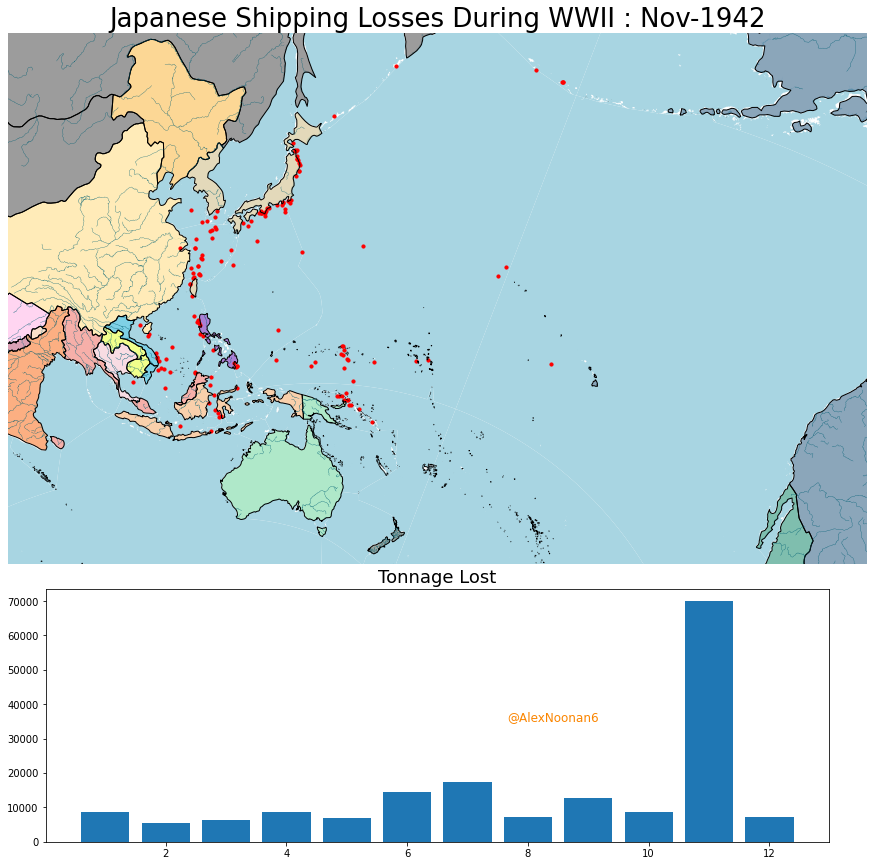

In [ ]:
month_index = 12
  
fig  = plt.figure(constrained_layout=False, figsize=(60, 20))
gs1 = fig.add_gridspec(nrows=4, ncols=8, hspace=0.1)
fig_ax1 = fig.add_subplot(gs1[0:2,:])
fig_ax2 = fig.add_subplot(gs1[2,3:5])
# Limits
fig_ax1.set_xlim([plot_bounds[0], plot_bounds[1]])
fig_ax1.set_ylim([plot_bounds[2], plot_bounds[3]])



subsetdf = gdf[gdf['Month Index']<=month_index]

Canvas.boundary.plot(ax = fig_ax1, color='black', linewidth=1 )

# Oceans
SouthChinaSea.plot(ax=fig_ax1, facecolor='#a8d5e2')
SouthPacific.plot(ax=fig_ax1, facecolor='#a8d5e2')
IndianOcean.plot(ax=fig_ax1, facecolor='#a8d5e2') 
NorthPacific.plot(ax=fig_ax1, facecolor='#a8d5e2') 

# Minor Geographic features
MinorIslands.plot(ax = fig_ax1, color='black', linewidth=1)
Reefs.plot(ax = fig_ax1, color="black", linewidth=1)
RiversAndLakes.plot(ax = fig_ax1, color='#005f73', linewidth=0.3)

# Countries
Japan.plot(ax = fig_ax1, color='#c9b576', alpha=0.5) 
UnitedStates.plot(ax = fig_ax1, color='#184e77', alpha=0.5) 
Mexico.plot(ax = fig_ax1, color='#007f5f', alpha=0.5) 
China.plot(ax = fig_ax1, color='#ffd972', alpha=0.5) 
DutchEastIndies.plot(ax = fig_ax1, color='#f4a259', alpha=0.5) 
Britain.plot(ax = fig_ax1, color='#ee6055', alpha=0.5) 
NewZealand.plot(ax = fig_ax1, color='#425144', alpha=0.5)
Australia.plot(ax = fig_ax1, color='#60d394', alpha=0.5)
USSR.plot(ax = fig_ax1, color='#3a3a3a', alpha=0.5)
India.plot(ax = fig_ax1, color='#fb6107', alpha=0.5) 
FrenchIndoChina.plot(ax = fig_ax1, color='#00a5cf', alpha=0.5) 
Manchuria.plot(ax = fig_ax1, color='#fbb02d', alpha=0.5)
Laos.plot(ax = fig_ax1, color='#e4ff1a', alpha=0.5)
Philippines.plot(ax = fig_ax1, color='#5603ad', alpha=0.5)
Thailand.plot(ax = fig_ax1, color='#f2bac9', alpha=0.5)
Tibet.plot(ax = fig_ax1, color='#fface4', alpha=0.5)
Cambodia.plot(ax = fig_ax1, color='#e4ff1a', alpha=0.5)
Bhutan.plot(ax = fig_ax1, color='#f5c396', alpha=0.5)
Nepal.plot(ax = fig_ax1, color='#b4436c', alpha=0.5)
# ship plot
subsetdf.plot(ax = fig_ax1, color='red', markersize=10)


gdf['Month_Name'] = gdf['Month'].apply(month_name)

month_label = gdf.loc[gdf['Month Index']==month_index, ['Month_Name','Year']].drop_duplicates()
month_label.reset_index(drop=True)


fig_ax1.set_title('Japanese Shipping Losses During WWII : ' + str(month_label.iat[0,0]) + "-" + str(month_label.iat[0,1]), fontsize=26)
#barplot
fig_ax2.set_title('Tonnage Lost', fontsize=18)
fig_ax2.bar(subsetdf['Month Index'], subsetdf['Tonnage'])

fig.text(0.55, 0.4, '@AlexNoonan6', fontsize = 12,
       color ='#fb8500', ha ='right', va ='bottom')
# saving file
filename = str(month_label.iat[0,0]) + "-" + str(month_label.iat[0,1]) + ".png"
fig_ax1.axis('off')
plt.savefig(filename, bbox_inches='tight')
#plt.show()
plt.close()

**bold text**# Base Gif Timelapse

In [ ]:
%timeit
filenames = []

# loop through and saving gifs for each month; excluding if empty
for month in months:
    if len(gdf[gdf['Month Index']==month]) == 0:
      pass
    else:
      filenames.append(map_plot(month_index=month))

# build gif
with imageio.get_writer('Japan_Timelapse.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)


## Subplot of tonnage by month
---



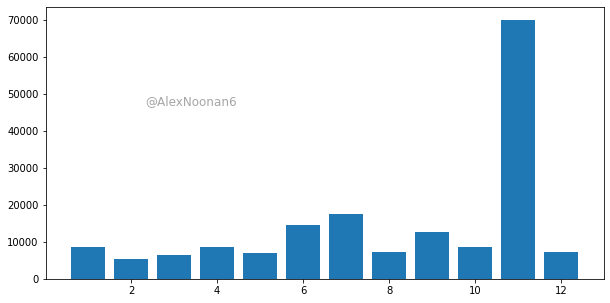

In [ ]:
gdf['Month_Name'] = gdf['Month'].apply(month_name)

gdf['Month_Label'] = str(gdf['Month_Name']) + "-" + str(gdf['Year'])

labels = list(gdf['Month_Label'])
gdf2 = gdf[gdf['Month Index']<=month_index]

fig = plt.figure(figsize=(10,5))
plt.bar(gdf2['Month Index'], gdf2['Tonnage'])

fig.text(0.39, 0.6, '@AlexNoonan6', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
plt.show()